200
0.055651940580959146
0.008410917508971385


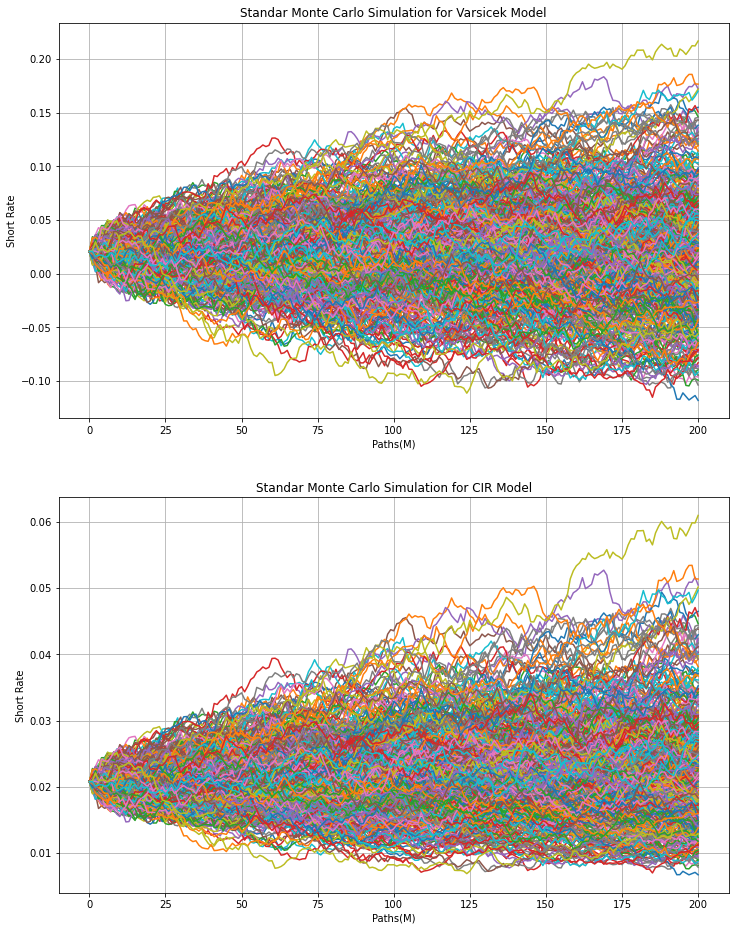

In [1]:
# part ONE: MC simulation for the CIR model in standard approach========#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm


def EulerMCRates(parameters): # standard simulation 
    np.random.seed(1000)

    # time setup
    #T = parameters['setup']['T']  # total time/maturity
    numSteps = parameters['setup']['numSteps']  # number of steps
    numPaths = parameters['setup']['numPaths']  # number of simulated paths
    dt = parameters['setup']['dt']

    # model parameters
    m_name = parameters['model']['name']
    r_0 = parameters['model']['r0']  # initial value
    a = parameters['model']['a']
    b = parameters['model']['b']
    sigma = parameters['model']['sigma']  # initial value
    
    # simulation    
    r = np.zeros((numSteps + 1, numPaths),dtype=float)
    r[0,:] = r_0
  
    ################         simluations for short rate r(t)              ########
    for i in range(numPaths):
        for t_step in range(1, numSteps+1):# start form step 1
            Zs = np.random.normal(0, 1, 1)  
            
            if m_name == 'Vasicek':
                              #r(0,0)
                r[t_step,i] = r[t_step-1,i] + a*(b-r[t_step-1,i])*dt + sigma*np.sqrt(dt)*Zs # Vasicek model with Euler shceme
            elif m_name == 'CIR':
                r[t_step,i] = r[t_step-1,i] + a*(b-r[t_step-1,i])*dt + sigma*np.sqrt(r[t_step-1,i]*dt)*Zs # CIR model with Euler shceme
                                                                                     #r(i-1)
    return r


if __name__=="__main__": # main function
    # initial value
    r0 = 0.020797
    
    # model parameters
    # a*b>= sigma^2/2 to ensure positivity of short rates
    m_name = 'Vasicek'  #'Vasicek'
    a = 0.274994
    b = 0.041726
    sigma = 0.085892       
    
    # discrete setup
    T = 0.5     # maturity
    N = 200  # steps
    dt = T/N
    M = 500
    
    parameters = {'model':{'r0':r0, 'a':a, 'b':b, 'sigma':sigma, 'name':m_name}, 
                  'setup':{'T':T, 'numSteps':N, 'dt': T/N, 'numPaths':M}# for simulation               
                 }
    
    print(parameters['setup']['numSteps'])
    
    # Task 1
    # simulate the V-model rates paths
    Sim_r = EulerMCRates(parameters)
    print(np.std(Sim_r[-1,:]))
    
    # simulate the CIR-model rates paths
    parameters_1=parameters
    parameters_1['model']['name']='CIR'
    Sim_r_CIR=EulerMCRates(parameters_1)
    print(np.std(Sim_r_CIR[-1,:]))
    
    
    
     # standard MC
    plt.figure(figsize=(12,16))
    # the MC for Varsicek
    plt.subplot(2,1,1)
    plt.plot(Sim_r)
    plt.grid(True)
    plt.xlabel('Paths(M)')
    plt.ylabel('Short Rate')
    plt.title('Standar Monte Carlo Simulation for Varsicek Model')
    
    # the MC for CIR
    plt.subplot(2,1,2)
    plt.plot(Sim_r_CIR)
    plt.grid(True)
    plt.xlabel('Paths(M)')
    plt.ylabel('Short Rate')
    plt.title('Standar Monte Carlo Simulation for CIR Model')
    

0.07392577652833127 0.051748043569831884
0.011088866479249691
0.01155840690822185 0.00785710383203521 0.0023287187092361273


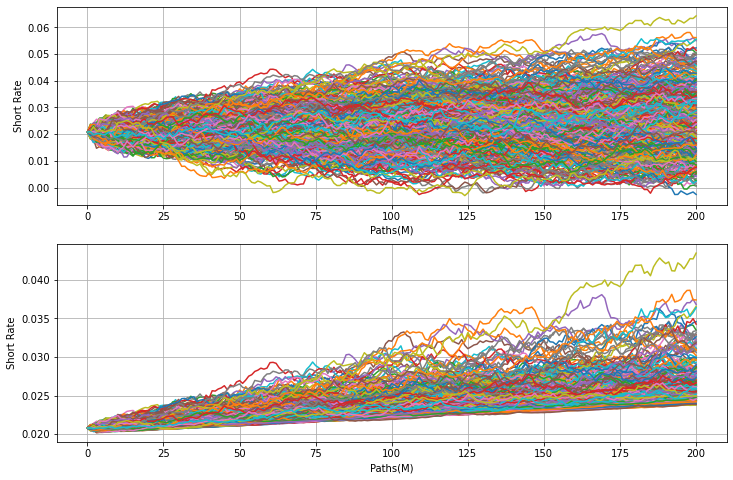

In [1]:
#====== part ONE: MC simulation for the CIR model in variance reduction approach========#
#====== compare with two models: ===========#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

def EulerMCRates_Control(parameters):
    np.random.seed(1000)

    # time setup
    #T = parameters['setup']['T']  # total time/maturity
    numSteps = parameters['setup']['numSteps']  # number of steps
    numPaths = parameters['setup']['numPaths']  # number of simulated paths
    dt = parameters['setup']['dt']

    # model parameters
    m_name = parameters['model']['name']
    r_0 = parameters['model']['r0']  # initial value
    a = parameters['model']['a']
    b = parameters['model']['b']
    sigma = parameters['model']['sigma']  # initial value
    
    # simulation    conduct 2 simulation 
    r_1 = np.zeros((numSteps + 1, numPaths),dtype=float)
    r_1[0,:] = r_0
    
    r_2 = np.zeros((numSteps + 1, numPaths),dtype=float)
    r_2[0,:] = r_0
  
    ################         simluations for short rate r(t)              ########
    for i in range(numPaths):
        for t_step in range(1, numSteps+1):
            Zs = np.random.normal(0, 1, 1)  
            Zs_minus = -0.7*Zs
            
            if m_name == 'Vasicek':            
                r_1[t_step,i] = r_1[t_step-1,i] + a*(b-r_1[t_step-1,i])*dt + sigma*np.sqrt(dt)*Zs # Vasicek model with Euler shceme
                r_2[t_step,i] = r_2[t_step-1,i] + a*(b-r_2[t_step-1,i])*dt + sigma*np.sqrt(dt)*Zs_minus # Vasicek model with Euler shceme
            elif m_name == 'CIR':
                r_1[t_step,i] = r_1[t_step-1,i] + a*(b-r_1[t_step-1,i])*dt + sigma*np.sqrt(r_1[t_step-1,i]*dt)*Zs # CIR model with Euler shceme
                r_2[t_step,i] = r_2[t_step-1,i] + a*(b-r_2[t_step-1,i])*dt + sigma*np.sqrt(r_2[t_step-1,i]*dt)*Zs_minus # CIR model with Euler shceme
            
    return r_1, r_2, (r_1+r_2)/2# 3rd-----> the result with variance reduciton 


if __name__=="__main__": # main function
    # initial value
    r0 = 0.020797
    
    # model parameters
    # a*b>= sigma^2/2 to ensure positivity of short rates
    m_name = 'Vasicek'  #'Vasicek'
    a = 0.274994
    b = 0.041726
    sigma = 0.085892       
    
    # discrete setup
    T = 1     # maturity
    N = 200  # steps
    dt = T/N
    M = 500
    
    parameters = {'model':{'r0':r0, 'a':a, 'b':b, 'sigma':sigma, 'name':m_name}, 
                  'setup':{'T':T, 'numSteps':N, 'dt': T/N, 'numPaths':M}# for simulation               
                 }
    
    
    # variance reduction of Vasicek model:
    [Sim_r1, Sim_r2, Sim_r3_reduction] = EulerMCRates_Control(parameters)
    print(np.std(Sim_r1[-1,:]),np.std(Sim_r2[-1,:]))
    print( np.std(Sim_r3_reduction[-1,:]))
    
    # variance reduction of CIR model :
    parameters_1=parameters
    parameters_1['model']['name']='CIR'
    [Sim_r1_C, Sim_r2_C, Sim_r3_reduction_C] = EulerMCRates_Control(parameters_1)
    print(np.std(Sim_r1_C[-1,:]),np.std(Sim_r2_C[-1,:]), np.std(Sim_r3_reduction_C[-1,:]))
    
    
    # MC with control variates-----variane reducion   
    plt.figure(figsize=(12,8))
    plt.subplot(2,1,1)
    plt.plot(Sim_r3_reduction)
    plt.grid(True)
    plt.xlabel('Paths(M)')
    plt.ylabel('Short Rate')
    
    
    plt.subplot(2,1,2)
    plt.plot(Sim_r3_reduction_C)
    plt.grid(True)
    plt.xlabel('Paths(M)')
    plt.ylabel('Short Rate')


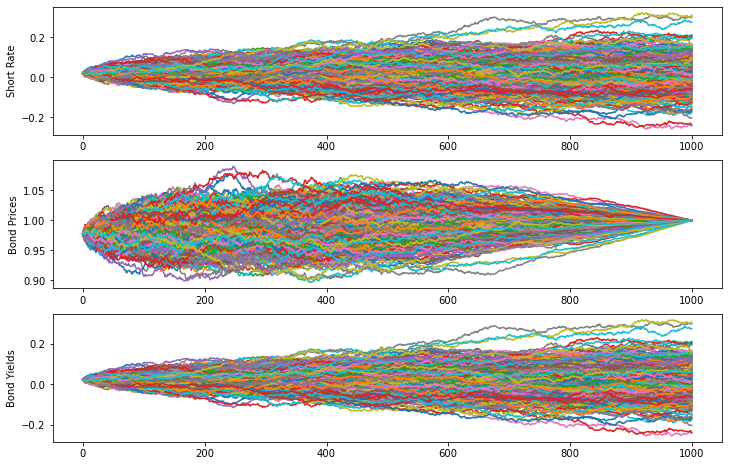

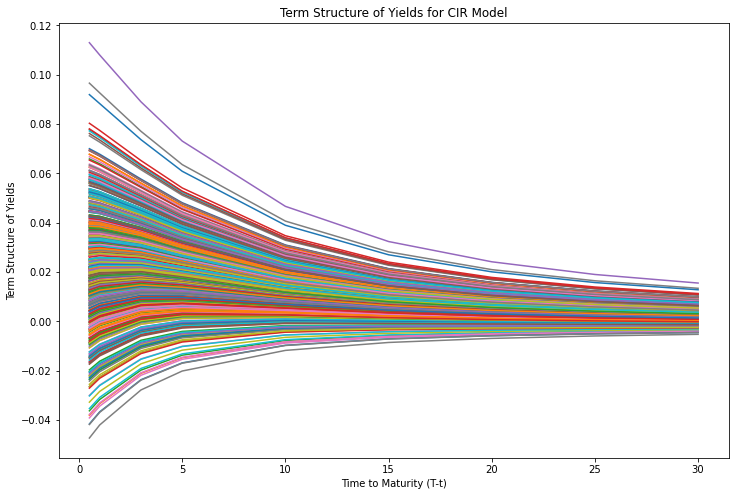

In [3]:
#=== part two======#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def TermStructure_Giventime(Rates_time_t, T_Maturity, parameters):
    
    numSteps = parameters['setup']['numSteps']  # number of steps
    numPaths = parameters['setup']['numPaths']  # number of simulated paths
    dt = parameters['setup']['dt']

    # model parameters
    m_name = parameters['model']['name']
    a = parameters['model']['a']
    b = parameters['model']['b']
    sigma = parameters['model']['sigma']  # initial value

    numSteps = parameters['setup']['numSteps']  # number of steps
    numPaths = parameters['setup']['numPaths']  # number of simulated paths
    dt = parameters['setup']['dt']
    
    n = len(T_Maturity)
    num_t = len(Rates_time_t)

    TS_yields = np.zeros((num_t, n))

    for t  in range(num_t):
        r_t = Rates_time_t[t]
        for T_i in T_Maturity:  # range(1,size(T))
            if T_i == 0:
                TS_yields[t][0] = r_t
            else:
                tao_j = T_i  # in year
                
                if m_name == 'Vasicek':
                    gamma = a**2*b - sigma**2/2
                    B = (1-np.exp(-a*tao_j))/a
                    A = (B-tao_j)*gamma/a - sigma**2*B**2/(4*a)            
                elif m_name == 'CIR':
                    gamma = np.sqrt(a** 2 + 2 * sigma ** 2)            
                    B = 2 * (np.exp(gamma * tao_j) - 1) / (
                                 (gamma + a) * (np.exp(gamma * tao_j) - 1) + 2 * gamma)
                    A = np.log(np.power(2 * gamma * np.exp((gamma + a) * tao_j / 2) / ((gamma + a) *
                                       (np.exp(gamma * tao_j) - 1) + 2 * gamma), 2 * a *b / (sigma ** 2)))
                
                TS_yields[t][T_Maturity.index(T_i)] = -(A - B * r_t) / tao_j
    
    return TS_yields



def MC_BondPriceYield(MC_short_rates, parameters):
    # Retrieve parameters for the short-rate model from dictionary "parameters"
    T_Maturity = parameters['setup']['T']  # total time/maturity
    numSteps = parameters['setup']['numSteps']  # number of steps
    numPaths = parameters['setup']['numPaths']  # number of simulated paths
    dt = parameters['setup']['dt']

    # model parameters
    m_name = parameters['model']['name']
    r_0 = parameters['model']['r0']  # initial value
    a = parameters['model']['a']
    b = parameters['model']['b']
    sigma = parameters['model']['sigma']  # initial value

    numSteps = parameters['setup']['numSteps']  # number of steps
    numPaths = parameters['setup']['numPaths']  # number of simulated paths
    dt = parameters['setup']['dt']

     # Construct A、B、Bond_Price
    A = np.zeros((numSteps+1,1))#=======>
                                #========the function A and B are vectors=====
    B = np.zeros((numSteps+1,1))#=======>
    Bond_Prices = np.zeros((numSteps+1, numPaths))
    Bond_Yields = np.zeros((numSteps+1, numPaths))
    for j in range(numSteps+1):  # in days
        tao_j = T_Maturity - j*dt  # in year
        
        if m_name == 'Vasicek':
            gamma = a**2*b - sigma**2/2
            B[j][0] = (1-np.exp(-a*tao_j))/a#++++++++> the value of vector
            A[j][0] = (B[j][0]-tao_j)*gamma/a - sigma**2*B[j][0]**2/(4*a)            
        elif m_name == 'CIR':
            gamma = np.sqrt(a** 2 + 2 * sigma ** 2)            
            B[j][0] = 2 * (np.exp(gamma * tao_j) - 1) / (
                         (gamma + a) * (np.exp(gamma * tao_j) - 1) + 2 * gamma)
            A[j][0] = np.log(np.power(2 * gamma * np.exp((gamma + a) * tao_j / 2) / ((gamma + a) *
                               (np.exp(gamma * tao_j) - 1) + 2 * gamma), 2 * a *b / (sigma ** 2)))
            
            #print('A=%f, B=%f, gamma=%f'%(A[j][0],B[j][0],gamma))
        
        for i in range(numPaths):
            Bond_Prices[j][i] = np.exp(A[j][0] - B[j][0] * MC_short_rates[j][i])  # np.exp(A-B*r)  
            
            if tao_j > 0:
                Bond_Yields[j][i] = -np.log(Bond_Prices[j][i])/tao_j  # -(A[j][0] - B[j][0] * MC_short_rates[j][i])/tao_j  # np.exp(A-B*r)
            else:
                Bond_Yields[j][i] = MC_short_rates[j][i]  # equal to spot rate at t=T
                

    return Bond_Prices,Bond_Yields 

def EulerMCRates(parameters):
    np.random.seed(1000)

    # time setup
    #T = parameters['setup']['T']  # total time/maturity
    numSteps = parameters['setup']['numSteps']  # number of steps
    numPaths = parameters['setup']['numPaths']  # number of simulated paths
    dt = parameters['setup']['dt']

    # model parameters
    m_name = parameters['model']['name']
    r_0 = parameters['model']['r0']  # initial value
    a = parameters['model']['a']
    b = parameters['model']['b']
    sigma = parameters['model']['sigma']  # initial value
    
    # simulation    
    r = np.zeros((numSteps + 1, numPaths),dtype=float)
    r[0,:] = r_0
  
    ################         simluations for short rate r(t)              ########
    for i in range(numPaths):
        for t_step in range(1, numSteps+1):
            Zs = np.random.normal(0, 1, 1)  
            
            if m_name == 'Vasicek':
                r[t_step,i] = r[t_step-1,i] + a*(b-r[t_step-1,i])*dt + sigma*np.sqrt(dt)*Zs # Vasicek model with Euler shceme
            elif m_name == 'CIR':
                r[t_step,i] = r[t_step-1,i] + a*(b-r[t_step-1,i])*dt + sigma*np.sqrt(r[t_step-1,i]*dt)*Zs # CIR model with Euler shceme
            
    return r




# main function
if __name__ == '__main__':

    # initial value
    r0 = 0.020797
    
    # model parameters
    # a*b>= sigma^2/2 to ensure positivity of short rates
    m_name = 'Vasicek'  #'Vasicek'CIR
    a = 0.274994
    b = 0.041726
    sigma = 0.085892       
    
    # discrete setup
    T = 1     # maturity
    N = 1000  # steps
    dt = T/N
    M = 500
    
    parameters = {'model':{'r0':r0, 'a':a, 'b':b, 'sigma':sigma, 'name':m_name}, 
                  'setup':{'T':T, 'numSteps':N, 'dt': T/N, 'numPaths':M}                
                 }
    
    
    MC_short_rates = EulerMCRates(parameters)
    rs_df = pd.DataFrame(MC_short_rates)
    rs_df.to_csv("MC_short_rates.csv")
    
    #       Estimate the dynamics of bond prices over time with simulated rate paths
    #       Estimate the dynamics of yields over time with simulated rate paths
    [MC_bond_prices, MC_bond_yields] = MC_BondPriceYield(MC_short_rates, parameters)
    #print(MC_bond_yields)
    rs_df = pd.DataFrame(MC_bond_yields)
    #rs_df.to_csv("MC_bond_yields.csv")
    
    
    #========Estimate the term structure of yileds at time 0<t<T, given T=[0.5, 1, 3, 5, 10, 15, 20, 25, 30]======#  
    Terms = ['0.5','1', '3', '5', '10', '15', '20', '25', '30']
    T_Maturity = list(map(float, Terms))
    
    N_t = 100
    
    Rates_t = np.transpose(MC_short_rates)[:,N_t]   # now Paths x Steps
    
    TS_yields = TermStructure_Giventime(Rates_t, T_Maturity, parameters)
    
    
     # Plot all results related to short-rate model specification
    plt.figure(figsize=(12, 8))
    plt.title('Short-Rates, Bond Prices and Yields for CIR Model')
    plt.subplot(3, 1, 1)
    plt.plot(MC_short_rates)  # times X paths
    #plt.xlabel('paths')
    plt.ylabel('Short Rate')   

    plt.subplot(3, 1, 2)
    plt.plot(MC_bond_prices)  # times X paths
    plt.ylabel('Bond Prices')
    
    plt.subplot(3, 1, 3)
    plt.plot(MC_bond_yields)  # times X paths
    plt.ylabel('Bond Yields')
    plt.show()
    
    
    #plt.plot(T_Maturity,TS_yields)
    plt.figure(figsize=(12, 8))
    plt.plot(T_Maturity, np.transpose(TS_yields))

    plt.xlabel('Time to Maturity (T-t)')
    plt.ylabel('Term Structure of Yields')
    plt.title('Term Structure of Yields for CIR Model')

    plt.show()
    